# Preprocessing of Sentiment Analysis of tweets using NLTK

### 1) Importing necessary libraries.

In [1]:
import nltk                                
from nltk.corpus import twitter_samples    
import matplotlib.pyplot as plt         
import random           

### 2) Importing twitter dataset from NLTK.There are 5000 positive and 5000 negative tweets.

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


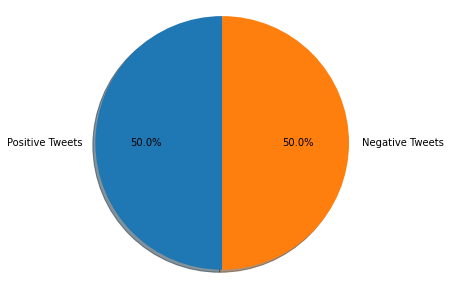

In [5]:
fig = plt.figure(figsize=(5, 5))
labels = 'Positive Tweets', 'Negative Tweets'
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()


In [6]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@officialbavaria that's awesome. Other people take much longer for that :)
I'm not a very bright man. :(


### 3) Selecting an example tweet from the positive tweets.

In [7]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


### 4) Downloading necessary libraries from NLTK.

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import re                                 
import string                              

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer  

### 5) Remowing retweet text, hyperlinks and hashtags from the tweet.

In [10]:
print('\033[92m' + tweet)

tweet2 = re.sub(r'^RT[\s]+', '', tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)

print('\033[94m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### 6) Tokenizing and lowercasing the tweet.

In [11]:
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### 7) Removing stop words and punctuation.

In [12]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: 
    if (word not in stopwords_english and
        word not in string.punctuation): 
        tweets_clean.append(word)

print('Removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### 8) Stemming the words.

In [21]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer() 

tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  
    tweets_stem.append(stem_word) 

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
